In [1]:
#import dependencies
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import joblib

In [5]:
cnx = create_engine('mysql+pymysql://'+username+':'+user_pass+'@'+db_host+'/'+db_name)
cnx.table_names()

<ipython-input-5-1eb76f472154>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  cnx.table_names()


['telecom_churn_data']

In [6]:
df=pd.read_sql("SELECT * FROM telecom_churn_data",cnx)
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
query = "SELECT * FROM telecom_churn_data"
telecom_churn_data = pd.read_sql(query, cnx)
telecom_churn_data.head(15)

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.7,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


#### Exploratory data analysis

In [8]:
# checking the number of raws and columns
telecom_churn_data.shape

(4617, 21)

In [8]:
#checking the information about the data
telecom_churn_data.info

<bound method DataFrame.info of      columns1 columns2 columns3   columns4 columns5 columns6 columns7  \
0          KS      128      415   382-4657       no      yes       25   
1          OH      107      415   371-7191       no      yes       26   
2          NJ      137      415   358-1921       no       no        0   
3          OH       84      408   375-9999      yes       no        0   
4          OK       75      415   330-6626      yes       no        0   
...       ...      ...      ...        ...      ...      ...      ...   
4612       NY       57      510   345-7512       no      yes       25   
4613       NM      177      408   343-6820       no      yes       29   
4614       VT       67      408   338-4794       no      yes       33   
4615       MI       98      415   355-8388       no      yes       23   
4616       IN      140      415   409-6884       no       no        0   

     columns8 columns9 columns10  ... columns12 columns13 columns14 columns15  \
0       26

In [9]:
telecom_churn_data.dtypes

columns1     object
columns2     object
columns3     object
columns4     object
columns5     object
columns6     object
columns7     object
columns8     object
columns9     object
columns10    object
columns11    object
columns12    object
columns13    object
columns14    object
columns15    object
columns16    object
columns17    object
columns18    object
columns19    object
columns20    object
columns21    object
dtype: object

In [10]:
# statistical measures of the dataset
telecom_churn_data.describe()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,373-6093,no,no,0,189.3,102,32.18,...,105,14.25,186.2,105,9.66,9.8,3,3,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


In [11]:
telecom_churn_data.columns

Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')

In [12]:
telecom_churn_data=telecom_churn_data.rename(columns={'columns1':'state', 'columns2':'account_length', 'columns3':'area_code', 'columns4':'phone', 'columns5':'international_plan', 'columns6':'vmail_plan',
       'columns7':'vmail_message', 'columns8':'day_mins', 'columns9':'day_calls', 'columns10':'day_charge', 'columns11':'eve_mins',
       'columns12':'eve_calls', 'columns13':'eve_charge', 'columns14':'night_mins', 'columns15':'night_calls', 'columns16':'night_charges',
       'columns17':'international_mins', 'columns18':'international_calls', 'columns19':'international_charge', 'columns20':'custserv_calls', 'columns21':'churn'})
telecom_churn_data.head(10)

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,eve_calls,eve_charge,night_mins,night_calls,night_charges,international_mins,international_calls,international_charge,custserv_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.7,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [13]:
telecom_churn_data['churn'].value_counts()

 False.    3961
 True.      656
Name: churn, dtype: int64

In [14]:
100*telecom_churn_data['churn'].value_counts()/len(telecom_churn_data['churn'])

 False.    85.79164
 True.     14.20836
Name: churn, dtype: float64

In [15]:
def plot_target_dist(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (20, 10))
    plt.subplot(121)
    plt.pie(telecom_churn_data.churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%1.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.subplot(122)
    t = sns.countplot(telecom_churn_data.churn)
    t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
    t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.title('Churn Outcome Distributions', fontsize = 30, fontweight = 'bold')
    plt.tight_layout()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


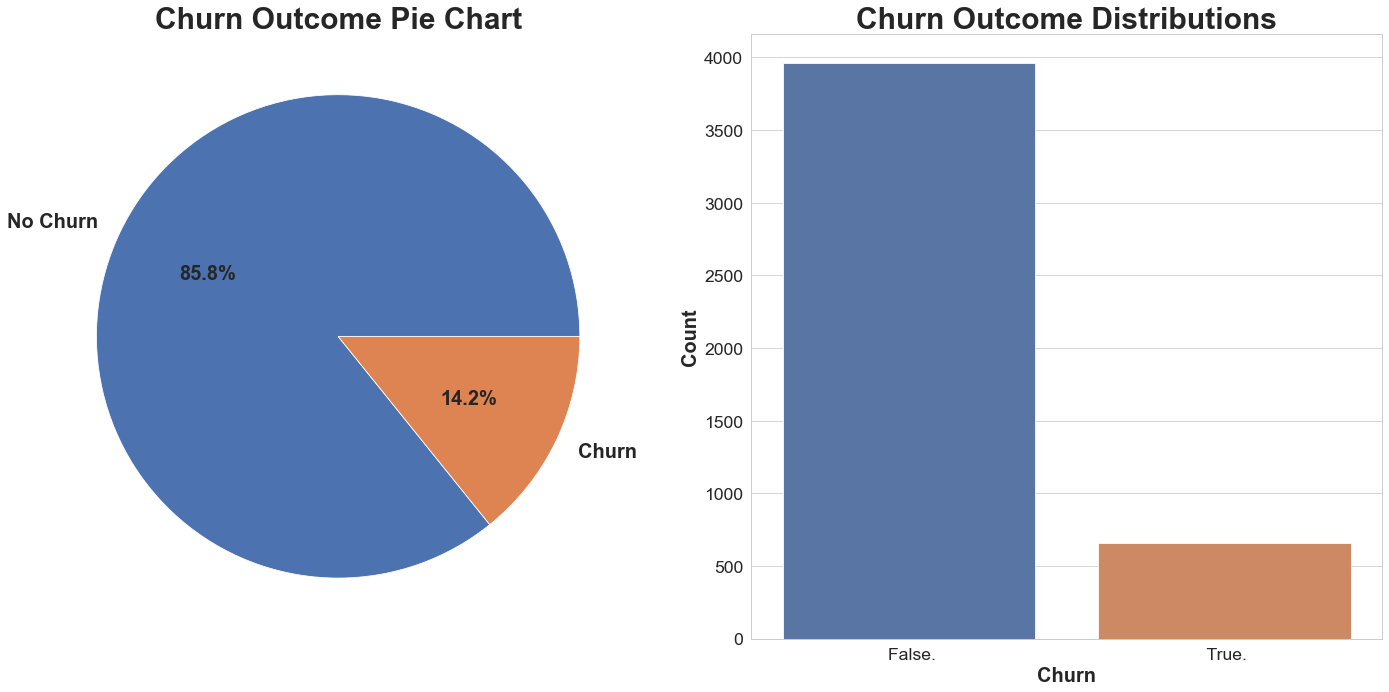

In [16]:
plot_target_dist(telecom_churn_data)

* Highly imbalanced data
* Almost 85% of customers are continue with the company
* Almost 14% of customers didn't continue with the company

In [17]:
#checking the information about the data
telecom_churn_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 4617 non-null   object
 1   account_length        4617 non-null   object
 2   area_code             4617 non-null   object
 3   phone                 4617 non-null   object
 4   international_plan    4617 non-null   object
 5   vmail_plan            4617 non-null   object
 6   vmail_message         4617 non-null   object
 7   day_mins              4617 non-null   object
 8   day_calls             4617 non-null   object
 9   day_charge            4617 non-null   object
 10  eve_mins              4617 non-null   object
 11  eve_calls             4617 non-null   object
 12  eve_charge            4617 non-null   object
 13  night_mins            4617 non-null   object
 14  night_calls           4617 non-null   object
 15  night_charges         4617 non-null   

In [18]:
# check for null values
telecom_churn_data.isnull().sum()

state                   0
account_length          0
area_code               0
phone                   0
international_plan      0
vmail_plan              0
vmail_message           0
day_mins                0
day_calls               0
day_charge              0
eve_mins                0
eve_calls               0
eve_charge              0
night_mins              0
night_calls             0
night_charges           0
international_mins      0
international_calls     0
international_charge    0
custserv_calls          0
churn                   0
dtype: int64

* No missing values in the data

In [19]:
tl_churn_data = telecom_churn_data.copy()

In [20]:
#checking unique values in each columns
for i in telecom_churn_data.columns:
    print(f"unique values in {i}'s and unique value count is: {telecom_churn_data[i].nunique()}")
    print(f"{telecom_churn_data[i].unique()}\n")

unique values in state's and unique value count is: 51
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

unique values in account_length's and unique value count is: 218
['128' '107' '137' '84' '75' '118' '121' '147' '117' '141' '65' '74' '168'
 '95' '62' '161' '85' '93' '76' '73' '77' '130' '111' '132' '174' '57'
 '54' '20' '49' '142' '172' '12' '72' '36' '78' '136' '149' '98' '135'
 '34' '160' '64' '59' '119' '97' '52' '60' '10' '96' '87' '81' '68' '125'
 '116' '38' '40' '43' '113' '126' '150' '138' '162' '90' '50' '82' '144'
 '46' '70' '55' '106' '94' '155' '80' '104' '99' '120' '108' '122' '157'
 '103' '63' '112' '41' '193' '61' '92' '131' '163' '91' '127' '110' '140'
 '83' '145' '56' '151' '139' '6' '115' '146' '185' '148' '32' '25' '179'
 '67' '19' '170' '164' '51' '208' '

In [21]:
#converting data types
telecom_churn_data["account_length"] = telecom_churn_data['account_length'].astype('int')
telecom_churn_data["area_code"] = telecom_churn_data['area_code'].astype('float')
telecom_churn_data["vmail_message"] = telecom_churn_data['vmail_message'].astype('float')
telecom_churn_data["day_mins"] = telecom_churn_data['day_mins'].astype('float')
telecom_churn_data["day_calls"] = telecom_churn_data['day_calls'].astype('float')
telecom_churn_data["day_charge"] = telecom_churn_data['day_charge'].astype('float')
telecom_churn_data["eve_mins"] = telecom_churn_data['eve_mins'].astype('float')
telecom_churn_data["eve_calls"] = telecom_churn_data['eve_calls'].astype('float')
telecom_churn_data["eve_charge"] = telecom_churn_data['eve_charge'].astype('float')
telecom_churn_data["night_mins"] = telecom_churn_data['night_mins'].astype('float')
telecom_churn_data["night_calls"] = telecom_churn_data['night_calls'].astype('float')
telecom_churn_data["night_charges"] = telecom_churn_data['night_charges'].astype('float')
telecom_churn_data["international_mins"] = telecom_churn_data['international_mins'].astype('float')
telecom_churn_data["international_calls"] = telecom_churn_data['international_calls'].astype('float')
telecom_churn_data["international_charge"] = telecom_churn_data['international_charge'].astype('float')
telecom_churn_data["custserv_calls"] = telecom_churn_data['custserv_calls'].astype('float')
telecom_churn_data.dtypes



state                    object
account_length            int32
area_code               float64
phone                    object
international_plan       object
vmail_plan               object
vmail_message           float64
day_mins                float64
day_calls               float64
day_charge              float64
eve_mins                float64
eve_calls               float64
eve_charge              float64
night_mins              float64
night_calls             float64
night_charges           float64
international_mins      float64
international_calls     float64
international_charge    float64
custserv_calls          float64
churn                    object
dtype: object

In [22]:
telecom_churn_data.isnull().sum()

state                   0
account_length          0
area_code               0
phone                   0
international_plan      0
vmail_plan              0
vmail_message           0
day_mins                0
day_calls               0
day_charge              0
eve_mins                0
eve_calls               0
eve_charge              0
night_mins              0
night_calls             0
night_charges           0
international_mins      0
international_calls     0
international_charge    0
custserv_calls          0
churn                   0
dtype: int64

##### Account length Vs Target

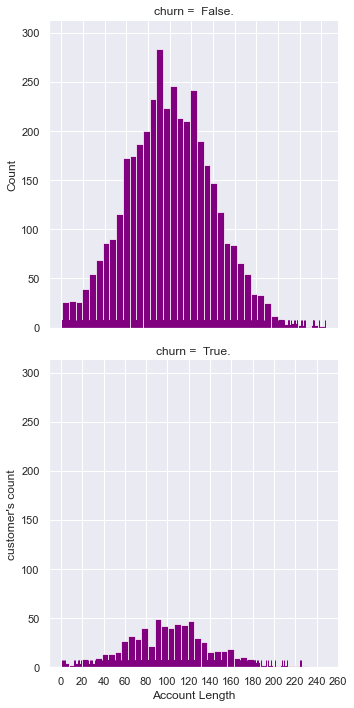

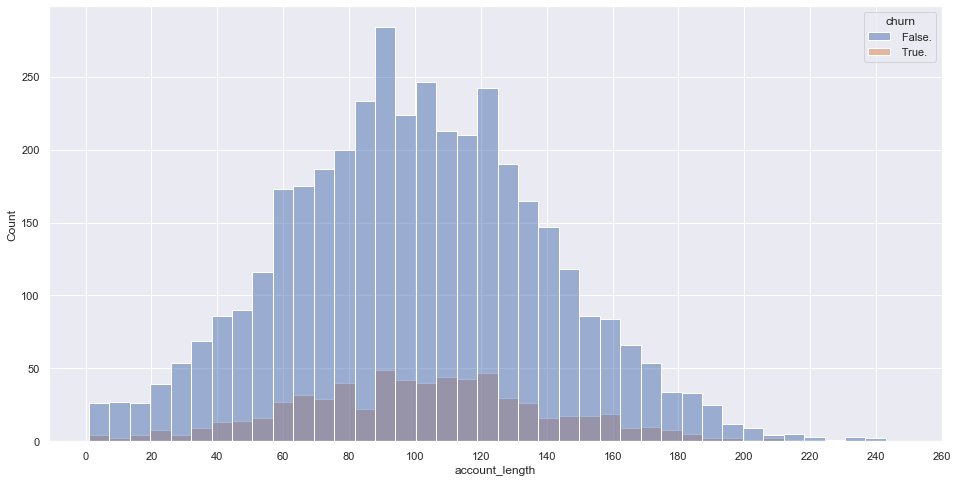

In [22]:
#checking distribution of account length based on target
sns.set(rc={'figure.figsize':(16,8)})
ax=sns.displot(x='account_length',data=telecom_churn_data,row='churn',alpha=1,kind='hist',rug="True",color='purple')
plt.xticks(np.arange(0, 270, step=20))
plt.xlabel('Account Length')
plt.ylabel("customer's count")
plt.show()
ax=sns.histplot(x='account_length',data=telecom_churn_data,hue='churn')
ax.set_xticks(range(0,270,20))
plt.show()

* Customers with account length 60 to 120 are more likely to churn

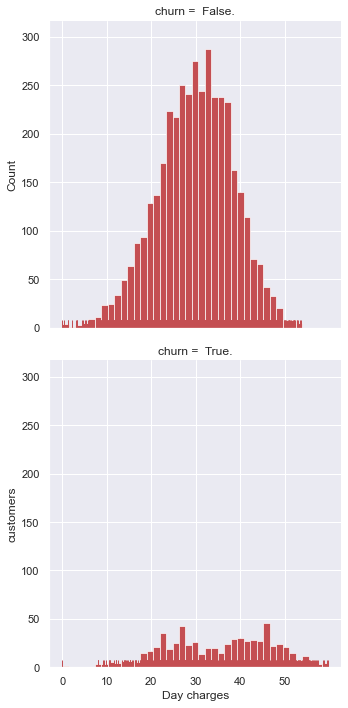

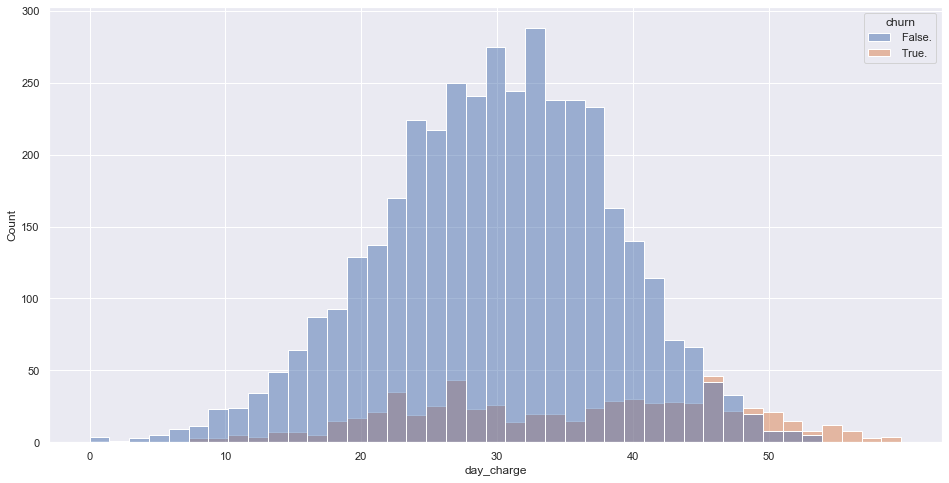

In [23]:
#checking distribution of day charge based on target 
sns.set(rc={'figure.figsize':(16,8)})
ax=sns.displot(x='day_charge',data=telecom_churn_data,row='churn',alpha=1,kind='hist',rug="True",color='r')
plt.xticks(np.arange(0, 60, step=10))
plt.xlabel('Day charges')
plt.ylabel('customers')
plt.show()
ax=sns.histplot(x='day_charge',data=telecom_churn_data,hue='churn')
ax.set_xticks(range(0,60,10))
plt.show()

* Customer churn rate is high when day chrges lies between 40 to 50

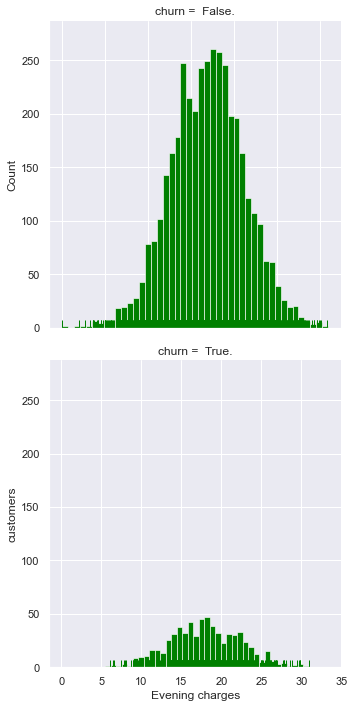

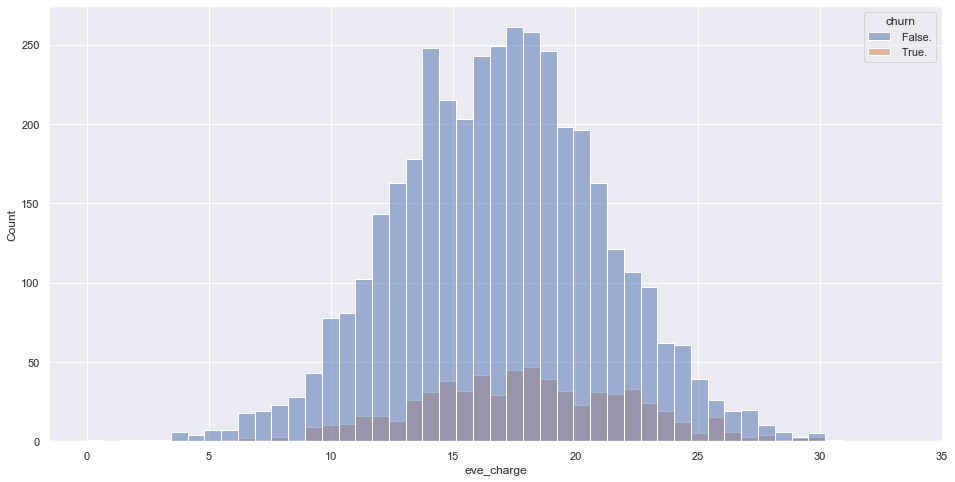

In [24]:
#checking distribution of evening charge based on target 
sns.set(rc={'figure.figsize':(16,8)})
ax=sns.displot(x='eve_charge',data=telecom_churn_data,row='churn',alpha=1,kind='hist',rug="True",color='green')
plt.xticks(np.arange(0, 40, step=5))
plt.xlabel('Evening charges')
plt.ylabel('customers')
plt.show()
ax=sns.histplot(x='eve_charge',data=telecom_churn_data,hue='churn')
ax.set_xticks(range(0,40,5))
plt.show()

* Customer churn rate high when evening charges lies nearly between  15 to 18

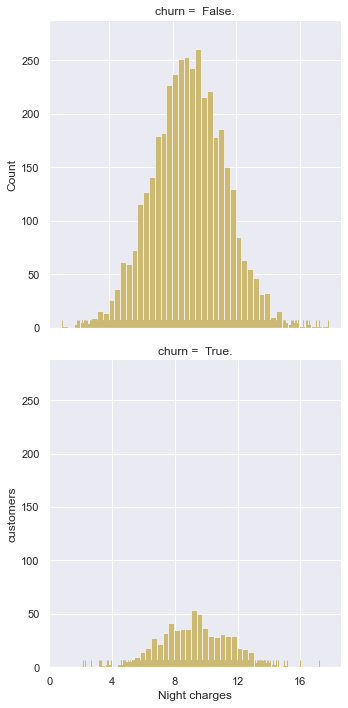

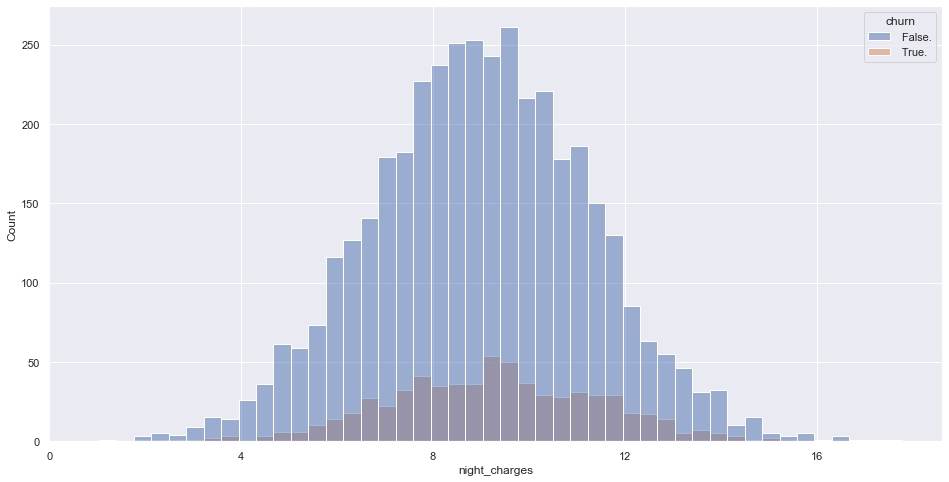

In [25]:
#checking distribution of night charges based on target 
sns.set(rc={'figure.figsize':(16,8)})
ax=sns.displot(x='night_charges',data=telecom_churn_data,row='churn',alpha=1,kind='hist',rug="True",color='y')
plt.xticks(np.arange(0, 20, step=4))
plt.xlabel('Night charges')
plt.ylabel('customers')
plt.show()
ax=sns.histplot(x='night_charges',data=telecom_churn_data,hue='churn',lw=1)
ax.set_xticks(range(0,20,4))
plt.show()

* Customer churn rate high when night charges lies nearly between  7 to 10

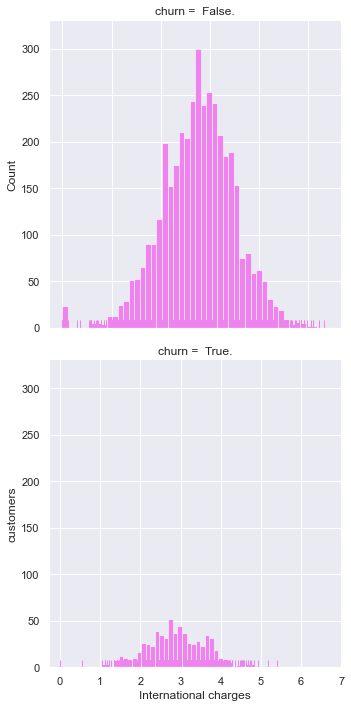

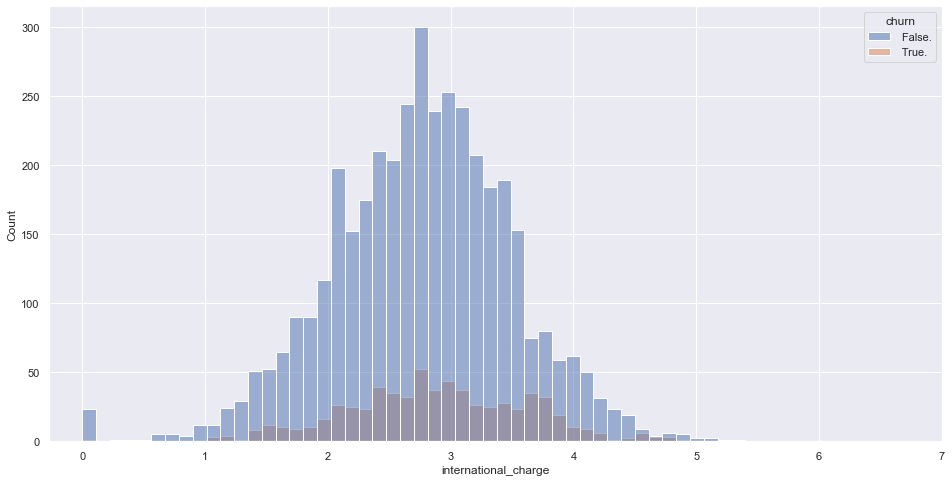

In [26]:
#checking distribution of international charges based on target 
sns.set(rc={'figure.figsize':(16,8)})
ax=sns.displot(x='international_charge',data=telecom_churn_data,row='churn',alpha=1,kind='hist',rug="True",color='violet')
plt.xticks(np.arange(0, 8))
plt.xlabel('International charges')
plt.ylabel('customers')
plt.show()
ax=sns.histplot(x='international_charge',data=telecom_churn_data,hue='churn',lw=1)
ax.set_xticks(range(0,8))
plt.show()

* Customer churn rate high when international charges lies nearly between  2.5 to 3

<AxesSubplot:xlabel='custserv_calls', ylabel='count'>

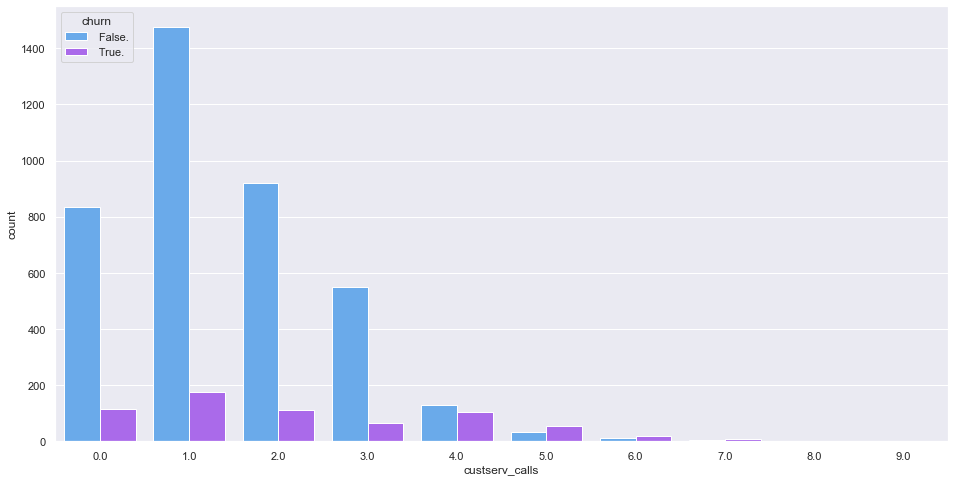

In [27]:
sns.countplot(x='custserv_calls',data=telecom_churn_data,hue='churn',palette='cool')

* Customer churn rate is high when customer service calls is 1

E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


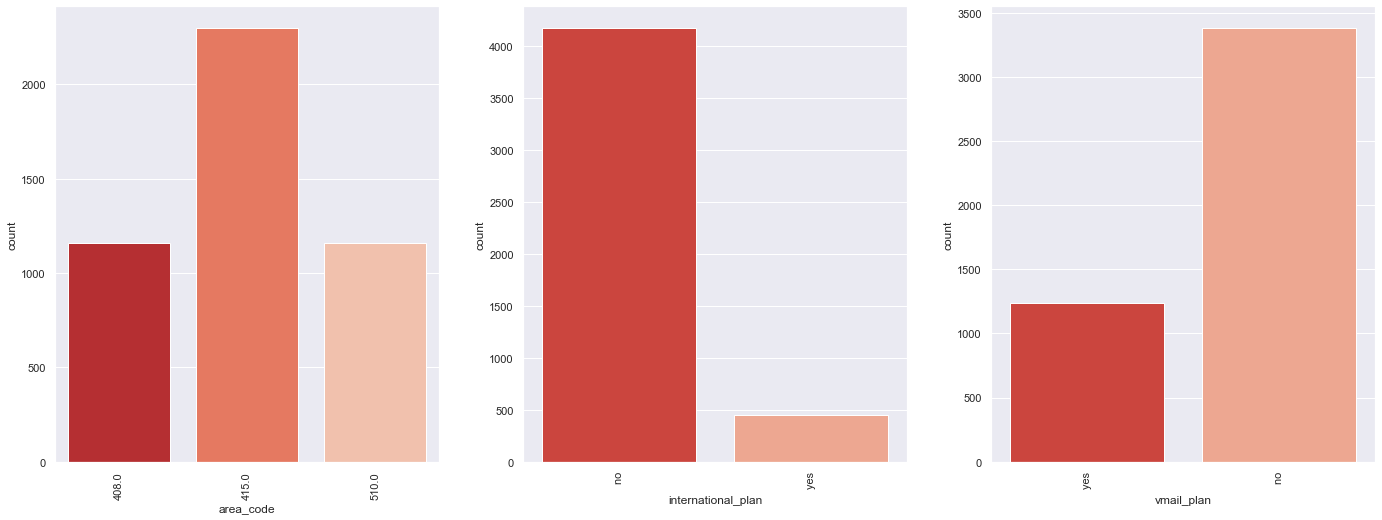

In [28]:
data=['area_code','international_plan','vmail_plan']
c=1
plt.figure(figsize=(20,45))

for i in data:
    plt.subplot(6,3,c)
    sns.countplot(telecom_churn_data[i],palette='Reds_r')
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

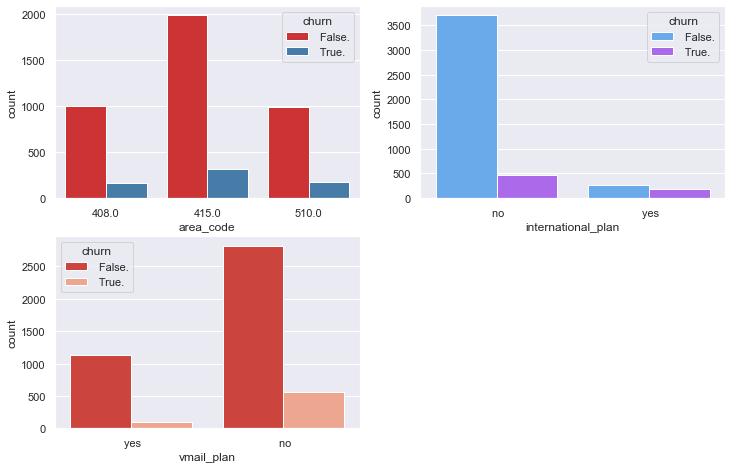

In [29]:
fig = plt.figure(1, (12, 12))
plt.subplot(3,2,1)
ax=sns.countplot(x='area_code',data=telecom_churn_data,hue='churn',palette='Set1')
plt.subplot(3,2,2)
ax=sns.countplot(x='international_plan',data=telecom_churn_data,hue='churn',palette='cool')
plt.subplot(3,2,3)
ax=sns.countplot(x='vmail_plan',data=telecom_churn_data,hue='churn',palette='Reds_r')

* There is not much difference among area code and customer churn rate
* Customers with international plans are more likely to churn than customers without international plans
* Customers without vmail plans are more likely to churn than customers with vmail plans

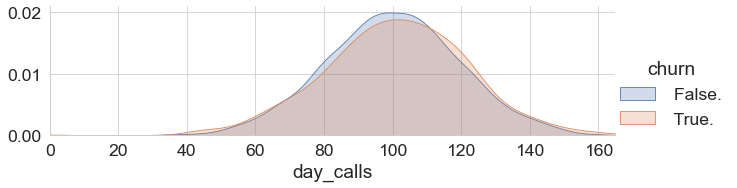

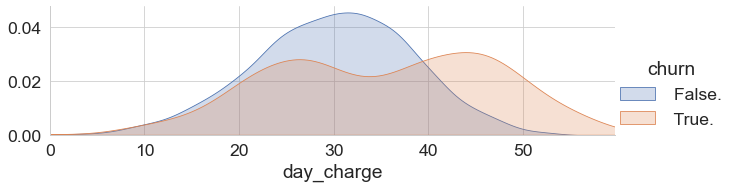

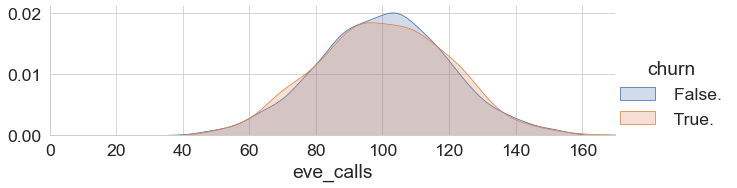

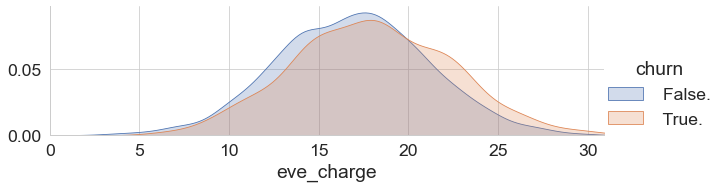

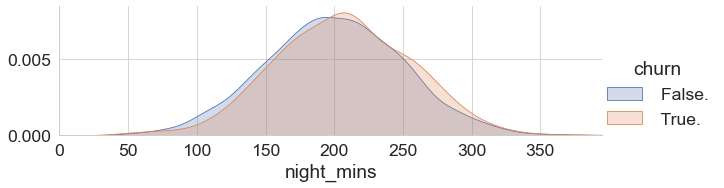

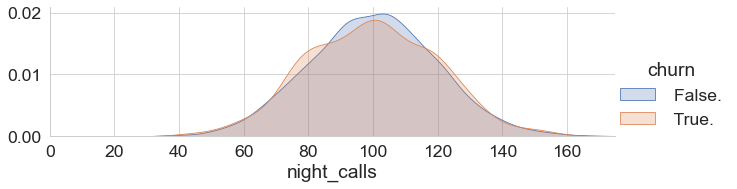

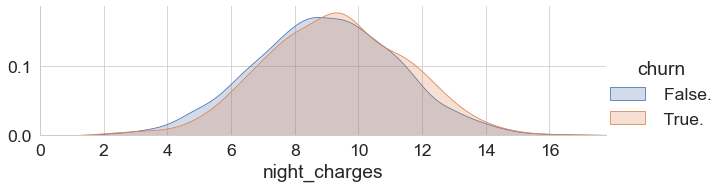

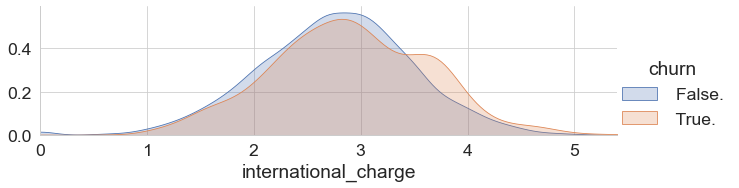

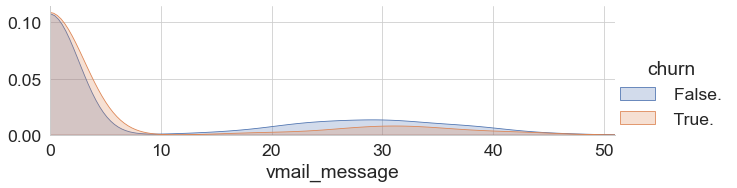

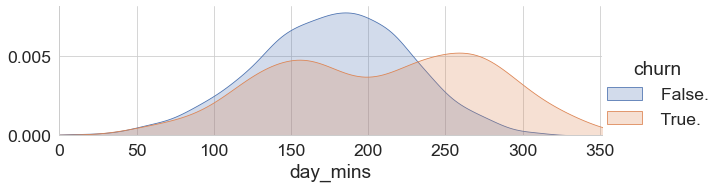

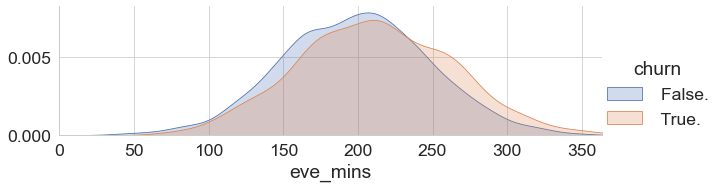

In [25]:
facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"day_calls",shade= True)
facet.set(xlim=(0, telecom_churn_data["day_calls"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"day_charge",shade= True)
facet.set(xlim=(0, telecom_churn_data["day_charge"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"eve_calls",shade= True)
facet.set(xlim=(0, telecom_churn_data["eve_calls"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"eve_charge",shade= True)
facet.set(xlim=(0, telecom_churn_data["eve_charge"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"night_mins",shade= True)
facet.set(xlim=(0, telecom_churn_data["night_mins"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"night_calls",shade= True)
facet.set(xlim=(0, telecom_churn_data["night_calls"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"night_charges",shade= True)
facet.set(xlim=(0, telecom_churn_data["night_charges"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"international_charge",shade= True)
facet.set(xlim=(0, telecom_churn_data["international_charge"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"vmail_message",shade= True)
facet.set(xlim=(0, telecom_churn_data["vmail_message"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"day_mins",shade= True)
facet.set(xlim=(0, telecom_churn_data["day_mins"].max()))
facet.add_legend()

facet = sns.FacetGrid(telecom_churn_data, hue = "churn", aspect = 3)
facet.map(sns.kdeplot,"eve_mins",shade= True)
facet.set(xlim=(0, telecom_churn_data["eve_mins"].max()))
facet.add_legend()



* churn rate is more when number of vmail message is 0
* churn rate is high when day mins lies nearly between 200 to 300
* churn rate is high when eve mins lies nearly between 180 to 200

<Figure size 1440x720 with 0 Axes>

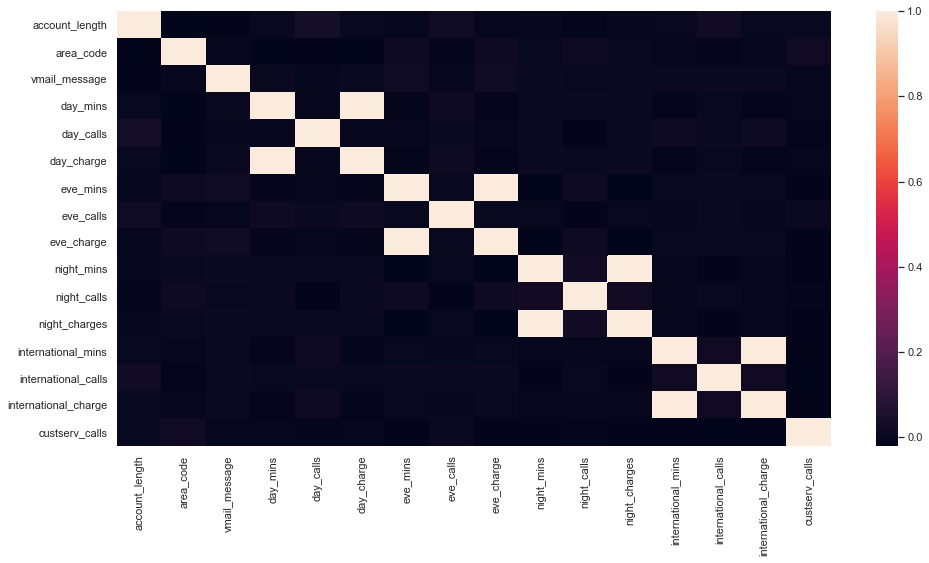

<Figure size 1440x720 with 0 Axes>

In [32]:
sns.heatmap(telecom_churn_data.corr(), annot=False)
plt.figure(figsize=(20,10))

* Have some multicollinear features.

In [33]:
telecom_churn_data.columns

Index(['state', 'account_length', 'area_code', 'phone', 'international_plan',
       'vmail_plan', 'vmail_message', 'day_mins', 'day_calls', 'day_charge',
       'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls',
       'night_charges', 'international_mins', 'international_calls',
       'international_charge', 'custserv_calls', 'churn'],
      dtype='object')

In [34]:
# removing highly correlated features
telecom_churn_data.drop(['vmail_message', 'day_charge', 'eve_charge', 'night_mins', 'international_mins'], axis=1, inplace=True)
telecom_churn_data.head()

,state,account_length,area_code,phone,international_plan,vmail_plan,day_mins,day_calls,eve_mins,eve_calls,night_calls,night_charges,international_calls,international_charge,custserv_calls,churn
0,KS,128,415.0,382-4657,no,yes,265.1,110.0,197.4,99.0,91.0,11.01,3.0,2.70,1.0,False.
1,OH,107,415.0,371-7191,no,yes,161.6,123.0,195.5,103.0,103.0,11.45,3.0,3.70,1.0,False.
2,NJ,137,415.0,358-1921,no,no,243.4,114.0,121.2,110.0,104.0,7.32,5.0,3.29,0.0,False.
3,OH,84,408.0,375-9999,yes,no,299.4,71.0,61.9,88.0,89.0,8.86,7.0,1.78,2.0,False.
4,OK,75,415.0,330-6626,yes,no,166.7,113.0,148.3,122.0,121.0,8.41,3.0,2.73,3.0,False.


<Figure size 1440x720 with 0 Axes>

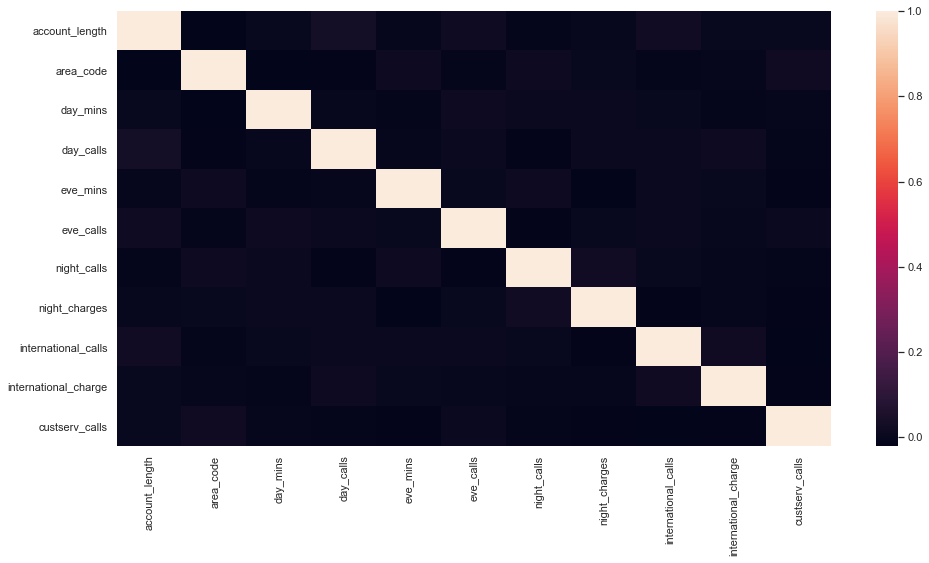

<Figure size 1440x720 with 0 Axes>

In [35]:
sns.heatmap(telecom_churn_data.corr(), annot=False)
plt.figure(figsize=(20,10))

* Total day mins have highest correlation with the target
* In general there is only low correlation among features

#### Data preprocessing

In [36]:
# Replacing churn values into integers
telecom_churn_data.churn = telecom_churn_data.churn.str.replace('False.', '0')
telecom_churn_data.churn = telecom_churn_data.churn.str.replace('True.', '1')
telecom_churn_data.churn = telecom_churn_data.churn.astype(int)
telecom_churn_data.head(15)

<ipython-input-36-1a4bb1536643>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  telecom_churn_data.churn = telecom_churn_data.churn.str.replace('False.', '0')
<ipython-input-36-1a4bb1536643>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  telecom_churn_data.churn = telecom_churn_data.churn.str.replace('True.', '1')


,state,account_length,area_code,phone,international_plan,vmail_plan,day_mins,day_calls,eve_mins,eve_calls,night_calls,night_charges,international_calls,international_charge,custserv_calls,churn
0,KS,128,415.0,382-4657,no,yes,265.1,110.0,197.4,99.0,91.0,11.01,3.0,2.70,1.0,0
1,OH,107,415.0,371-7191,no,yes,161.6,123.0,195.5,103.0,103.0,11.45,3.0,3.70,1.0,0
2,NJ,137,415.0,358-1921,no,no,243.4,114.0,121.2,110.0,104.0,7.32,5.0,3.29,0.0,0
3,OH,84,408.0,375-9999,yes,no,299.4,71.0,61.9,88.0,89.0,8.86,7.0,1.78,2.0,0
4,OK,75,415.0,330-6626,yes,no,166.7,113.0,148.3,122.0,121.0,8.41,3.0,2.73,3.0,0
5,AL,118,510.0,391-8027,yes,no,223.4,98.0,220.6,101.0,118.0,9.18,6.0,1.70,0.0,0
6,MA,121,510.0,355-9993,no,yes,218.2,88.0,348.5,108.0,118.0,9.57,7.0,2.03,3.0,0
7,MO,147,415.0,329-9001,yes,no,157.0,79.0,103.1,94.0,96.0,9.53,6.0,1.92,0.0,0
8,LA,117,408.0,335-4719,no,no,184.5,97.0,351.6,80.0,90.0,9.71,4.0,2.35,1.0,0
9,WV,141,415.0,330-8173,yes,yes,258.6,84.0,222.0,111.0,97.0,14.69,5.0,3.02,0.0,0


In [37]:
le = LabelEncoder()
telecom_churn_data.international_plan = le.fit_transform(telecom_churn_data.international_plan)
telecom_churn_data.vmail_plan = le.fit_transform(telecom_churn_data.vmail_plan)
telecom_churn_data.area_code = le.fit_transform(telecom_churn_data.area_code)

In [38]:
telecom_churn_data.head()

,state,account_length,area_code,phone,international_plan,vmail_plan,day_mins,day_calls,eve_mins,eve_calls,night_calls,night_charges,international_calls,international_charge,custserv_calls,churn
0,KS,128,1,382-4657,0,1,265.1,110.0,197.4,99.0,91.0,11.01,3.0,2.70,1.0,0
1,OH,107,1,371-7191,0,1,161.6,123.0,195.5,103.0,103.0,11.45,3.0,3.70,1.0,0
2,NJ,137,1,358-1921,0,0,243.4,114.0,121.2,110.0,104.0,7.32,5.0,3.29,0.0,0
3,OH,84,0,375-9999,1,0,299.4,71.0,61.9,88.0,89.0,8.86,7.0,1.78,2.0,0
4,OK,75,1,330-6626,1,0,166.7,113.0,148.3,122.0,121.0,8.41,3.0,2.73,3.0,0


#### Outlier detection

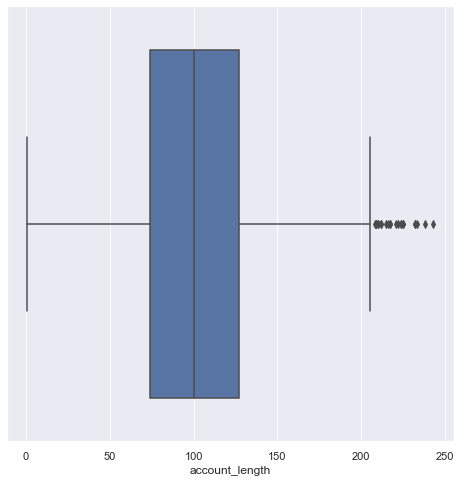

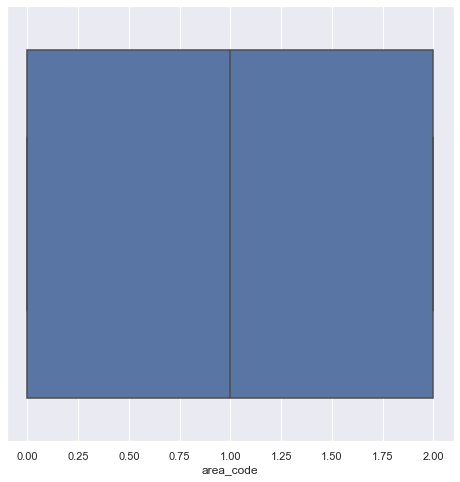

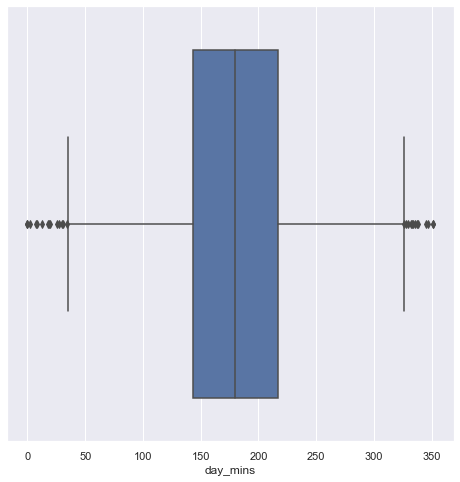

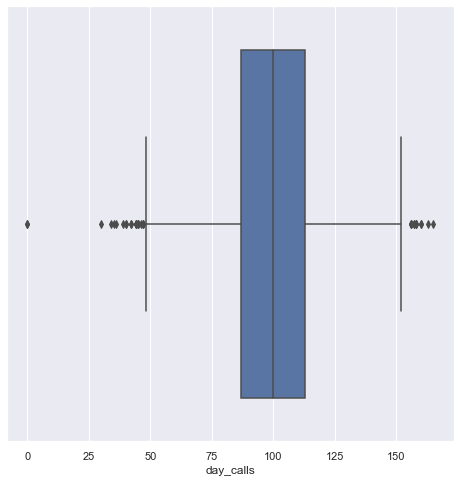

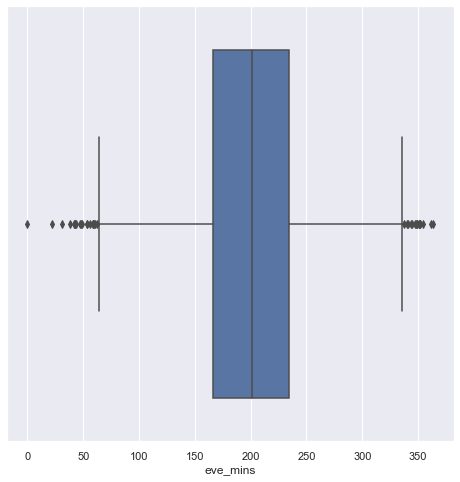

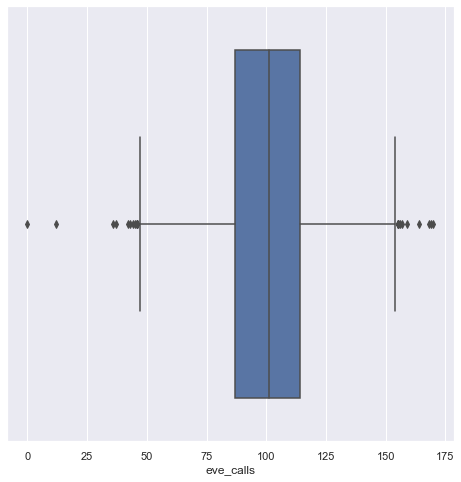

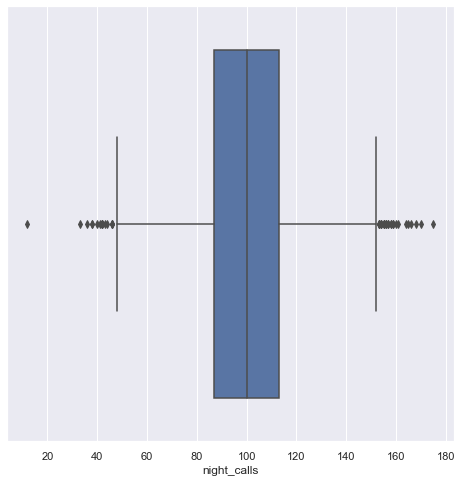

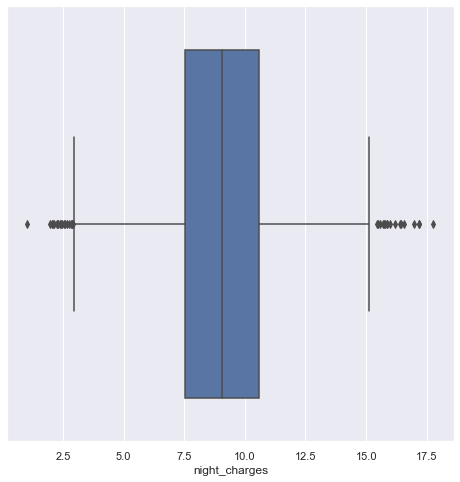

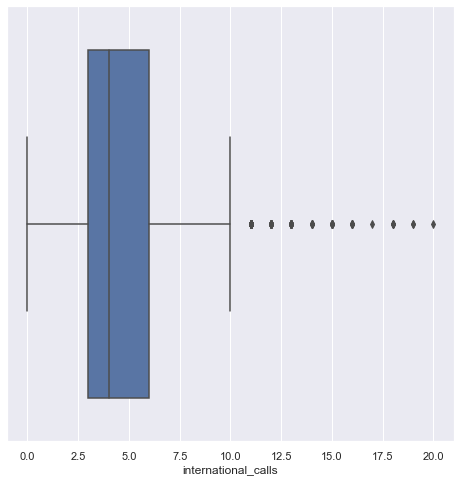

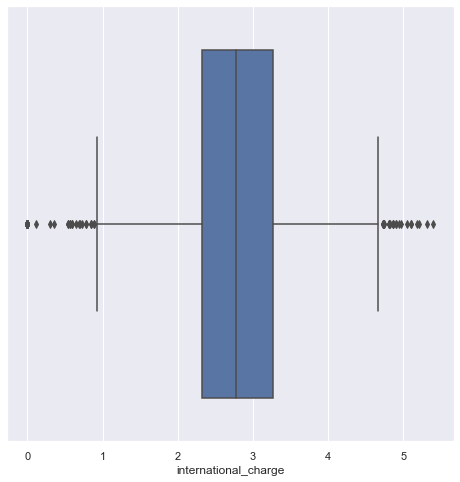

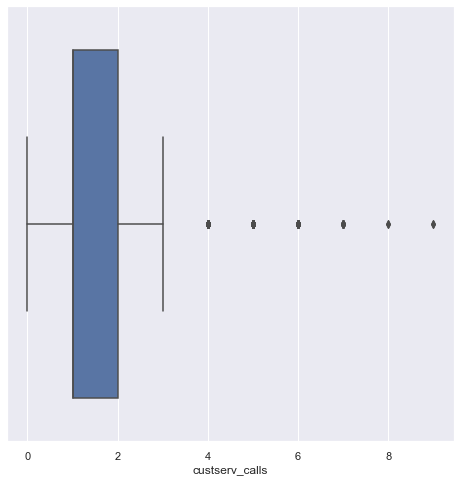

In [39]:
# checking for outliers
boxs = ['account_length', 'area_code', 'day_mins', 'day_calls', 'eve_mins','eve_calls','night_calls','night_charges','international_calls','international_charge','custserv_calls',]
for box in boxs:
    plt.figure(figsize=(8,8))
    sns.boxplot(x =telecom_churn_data[box])

* have outliers in some features

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


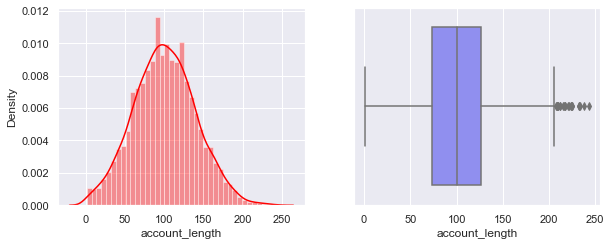

In [40]:
# checking the distribution of feature varibles
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.account_length,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.account_length,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


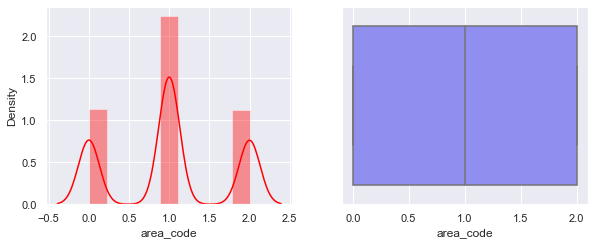

In [41]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.area_code,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.area_code,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


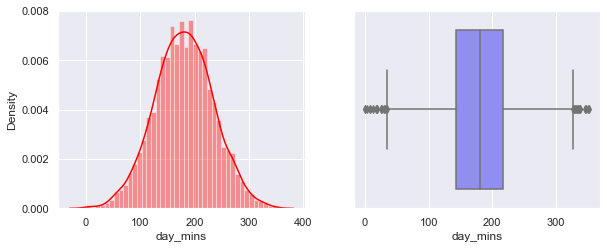

In [42]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.day_mins,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.day_mins,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


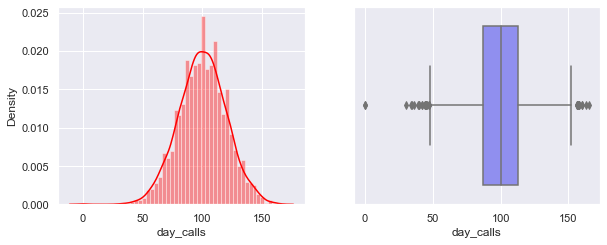

In [43]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.day_calls,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.day_calls,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


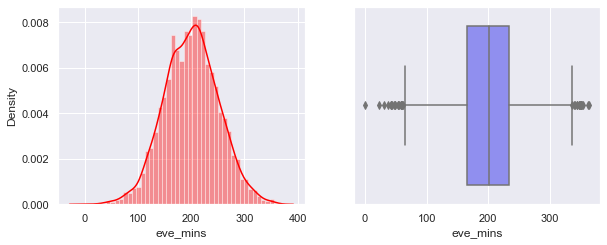

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.eve_mins,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.eve_mins,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


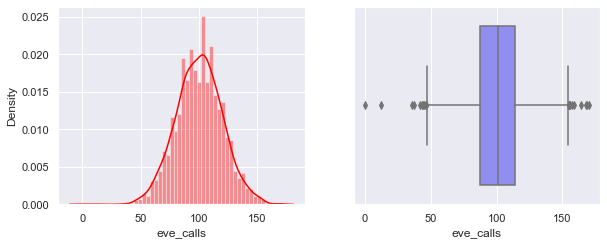

In [45]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.eve_calls,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.eve_calls,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


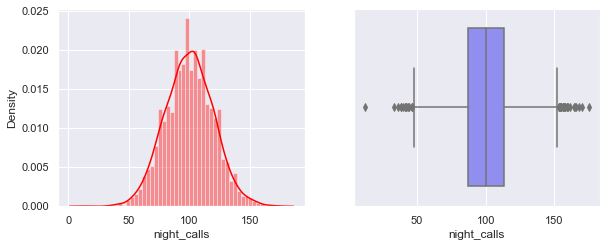

In [46]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.night_calls,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.night_calls,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


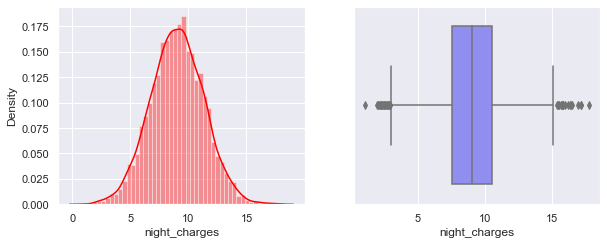

In [47]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.night_charges,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.night_charges,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


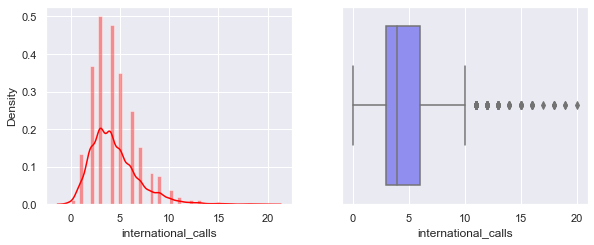

In [48]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.international_calls,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.international_calls,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


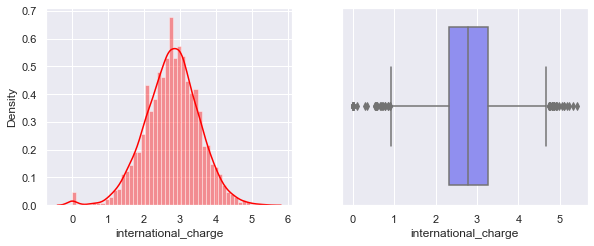

In [49]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.international_charge,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.international_charge,palette='cool')
plt.show()

E:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


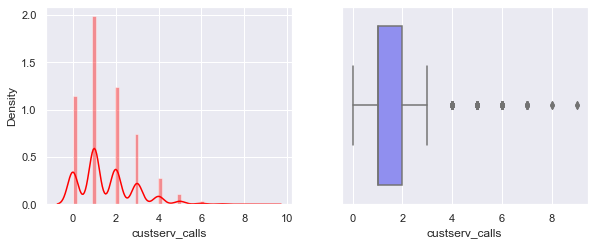

In [50]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.distplot(telecom_churn_data.custserv_calls,color='red')
plt.subplot(2,3,2)
sns.boxplot(telecom_churn_data.custserv_calls,palette='cool')
plt.show()

#### Removing outliers

In [51]:
Q1 = np.percentile(telecom_churn_data.account_length, 25)
Q1 = np.percentile(telecom_churn_data.area_code, 25)
Q1 = np.percentile(telecom_churn_data.day_mins, 25)
Q1 = np.percentile(telecom_churn_data.day_calls, 25)
Q1 = np.percentile(telecom_churn_data.eve_mins, 25)
Q1 = np.percentile(telecom_churn_data.eve_calls, 25)
Q1 = np.percentile(telecom_churn_data.night_calls, 25)
Q1 = np.percentile(telecom_churn_data.night_charges, 25)
Q1 = np.percentile(telecom_churn_data.international_calls, 25)
Q1 = np.percentile(telecom_churn_data.international_charge, 25)
Q1 = np.percentile(telecom_churn_data.custserv_calls, 25)
Q1

1.0

In [52]:
Q3 = np.percentile(telecom_churn_data.account_length, 75)
Q3 = np.percentile(telecom_churn_data.area_code, 75)
Q3 = np.percentile(telecom_churn_data.day_mins, 75)
Q3 = np.percentile(telecom_churn_data.day_calls, 75)
Q3 = np.percentile(telecom_churn_data.eve_mins, 75)
Q3 = np.percentile(telecom_churn_data.eve_calls, 75)
Q3 = np.percentile(telecom_churn_data.night_calls, 75)
Q3 = np.percentile(telecom_churn_data.night_charges, 75)
Q3 = np.percentile(telecom_churn_data.international_calls, 75)
Q3 = np.percentile(telecom_churn_data.international_charge, 75)
Q3 = np.percentile(telecom_churn_data.custserv_calls, 75)
Q3

2.0

In [53]:
IQR = Q3 - Q1
IQR

1.0

In [54]:
lower_limit= Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [55]:
telecom_churn_data [ (telecom_churn_data.account_length < lower_limit) | (telecom_churn_data.account_length > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.area_code< lower_limit) | (telecom_churn_data.area_code > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.day_mins< lower_limit) | (telecom_churn_data.day_mins > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.day_calls < lower_limit) | (telecom_churn_data.day_calls > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.eve_mins < lower_limit) | (telecom_churn_data.eve_mins > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.eve_calls < lower_limit) | (telecom_churn_data.eve_calls > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.night_calls < lower_limit) | (telecom_churn_data.night_calls > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.night_charges < lower_limit) | (telecom_churn_data.night_charges > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.international_calls < lower_limit) | (telecom_churn_data.international_calls > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.international_charge < lower_limit) | (telecom_churn_data.international_charge > upper_limit) ]
telecom_churn_data [ (telecom_churn_data.custserv_calls < lower_limit) | (telecom_churn_data.custserv_calls > upper_limit) ]



,state,account_length,area_code,phone,international_plan,vmail_plan,day_mins,day_calls,eve_mins,eve_calls,night_calls,night_charges,international_calls,international_charge,custserv_calls,churn
10,IN,65,1,329-6603,0,0,129.1,137.0,228.5,83.0,111.0,9.40,6.0,3.43,4.0,1
14,IA,62,1,366-9238,0,0,120.7,70.0,307.2,76.0,99.0,9.14,6.0,3.54,4.0,0
15,NY,161,1,351-7269,0,0,332.9,67.0,317.8,97.0,128.0,7.23,9.0,1.46,4.0,1
21,CO,77,0,393-7984,0,0,62.4,89.0,169.9,121.0,64.0,9.43,6.0,1.54,5.0,1
48,ID,119,1,398-1294,0,0,159.1,114.0,231.3,117.0,91.0,6.44,3.0,2.38,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,IL,107,0,354-3963,0,0,228.2,90.0,214.2,123.0,79.0,8.24,4.0,2.84,4.0,0
4550,WY,69,1,342-6200,0,0,211.7,94.0,236.1,124.0,90.0,11.37,2.0,1.94,4.0,0
4562,NM,42,1,389-2130,0,0,137.9,160.0,234.9,107.0,70.0,7.50,3.0,3.86,5.0,1
4568,NJ,124,1,338-5344,0,0,108.2,92.0,214.3,83.0,155.0,8.35,11.0,3.56,4.0,1


In [56]:
telecom_data = telecom_churn_data [ (telecom_churn_data.account_length >= lower_limit) & (telecom_churn_data.account_length <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.area_code >= lower_limit) & (telecom_churn_data.area_code <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.day_mins >= lower_limit) & (telecom_churn_data.day_mins <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.day_calls >= lower_limit) & (telecom_churn_data.day_calls <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.eve_mins >= lower_limit) & (telecom_churn_data.eve_mins <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.eve_calls >= lower_limit) & (telecom_churn_data.eve_calls <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.night_calls >= lower_limit) & (telecom_churn_data.night_calls <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.night_charges >= lower_limit) & (telecom_churn_data.night_charges <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.international_calls >= lower_limit) & (telecom_churn_data.international_calls <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.international_charge >= lower_limit) & (telecom_churn_data.international_charge <= upper_limit) ]
telecom_data = telecom_churn_data [ (telecom_churn_data.custserv_calls >= lower_limit) & (telecom_churn_data.custserv_calls <= upper_limit) ]



In [57]:
telecom_data

,state,account_length,area_code,phone,international_plan,vmail_plan,day_mins,day_calls,eve_mins,eve_calls,night_calls,night_charges,international_calls,international_charge,custserv_calls,churn
0,KS,128,1,382-4657,0,1,265.1,110.0,197.4,99.0,91.0,11.01,3.0,2.70,1.0,0
1,OH,107,1,371-7191,0,1,161.6,123.0,195.5,103.0,103.0,11.45,3.0,3.70,1.0,0
2,NJ,137,1,358-1921,0,0,243.4,114.0,121.2,110.0,104.0,7.32,5.0,3.29,0.0,0
3,OH,84,0,375-9999,1,0,299.4,71.0,61.9,88.0,89.0,8.86,7.0,1.78,2.0,0
4,OK,75,1,330-6626,1,0,166.7,113.0,148.3,122.0,121.0,8.41,3.0,2.73,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,2,345-7512,0,1,144.0,81.0,187.2,112.0,122.0,7.14,6.0,2.30,3.0,0
4613,NM,177,0,343-6820,0,1,189.0,91.0,303.1,96.0,116.0,7.36,1.0,4.24,3.0,0
4614,VT,67,0,338-4794,0,1,127.5,126.0,296.1,129.0,91.0,9.04,3.0,3.51,1.0,0
4615,MI,98,1,355-8388,0,1,168.9,98.0,226.3,117.0,96.0,7.45,3.0,3.86,0.0,0


In [58]:
# Removing less important features
telecom_data = telecom_data.drop(['phone', 'state', 'account_length', 'area_code'], axis=1)
telecom_data.head()

,international_plan,vmail_plan,day_mins,day_calls,eve_mins,eve_calls,night_calls,night_charges,international_calls,international_charge,custserv_calls,churn
0,0,1,265.1,110.0,197.4,99.0,91.0,11.01,3.0,2.70,1.0,0
1,0,1,161.6,123.0,195.5,103.0,103.0,11.45,3.0,3.70,1.0,0
2,0,0,243.4,114.0,121.2,110.0,104.0,7.32,5.0,3.29,0.0,0
3,1,0,299.4,71.0,61.9,88.0,89.0,8.86,7.0,1.78,2.0,0
4,1,0,166.7,113.0,148.3,122.0,121.0,8.41,3.0,2.73,3.0,0


In [59]:
X = telecom_data.drop('churn', axis =1)
y = telecom_data.churn

In [60]:
scaler = MinMaxScaler(feature_range=(-1,1))
telecom_data_scale = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
telecom_data_scale.describe()

,international_plan,vmail_plan,day_mins,day_calls,eve_mins,eve_calls,night_calls,night_charges,international_calls,international_charge,custserv_calls
count,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000
mean,-0.808426,-0.463874,0.026170,0.226945,0.108115,0.177805,0.080765,-0.043724,-0.554789,0.028537,-0.127481
std,0.588668,0.886006,0.307499,0.243202,0.280530,0.232906,0.243693,0.272190,0.247018,0.276346,0.650211
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-0.182361,0.067485,-0.083472,0.023529,-0.079755,-0.224148,-0.700000,-0.140741,-0.333333
50%,-1.000000,-1.000000,0.025320,0.226994,0.109453,0.176471,0.079755,-0.043634,-0.600000,0.040741,-0.333333
75%,-1.000000,1.000000,0.232432,0.386503,0.294638,0.329412,0.239264,0.141662,-0.400000,0.211111,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

In [62]:
# important feature using ExtraTreesRegressor

Selection = ExtraTreesRegressor()
Selection.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

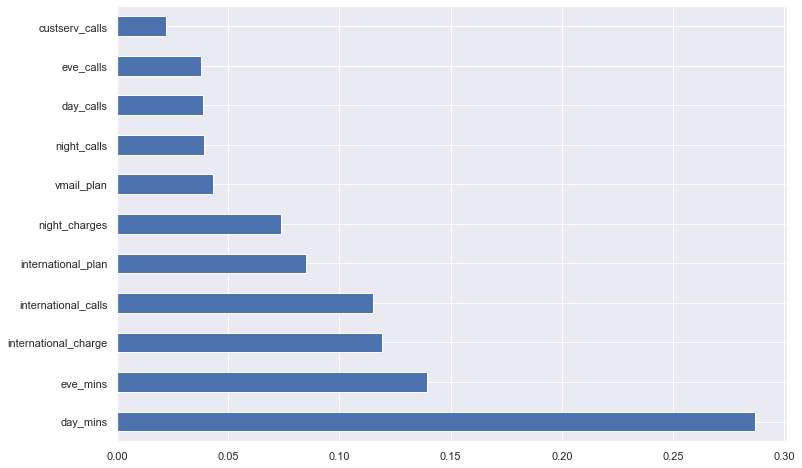

In [63]:
#plot graph of feature importance
plt.figure(figsize = (12,8))
Feature_importance = pd.Series(Selection.feature_importances_,index=X.columns)
Feature_importance.nlargest(20).plot(kind="barh")

In [64]:
# To solve imbalanced problem
smote = SMOTE(random_state=10)

X_train_smote , y_train_smote = smote.fit_resample(X_train, y_train)

### Random Forest

In [65]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_predict = rf.predict(X_test)

In [67]:

accuracy_score(y_test, y_predict)

0.9670588235294117

In [68]:
pd.crosstab(y_test, y_predict)

col_0,0,1
churn,,
0,762,4
1,24,60


In [69]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       766
           1       0.94      0.71      0.81        84

    accuracy                           0.97       850
   macro avg       0.95      0.85      0.90       850
weighted avg       0.97      0.97      0.97       850



In [70]:
ypred = y_predict
model = rf
print ('Confusion Matrix:')
print(confusion_matrix(y_test, ypred))
print('\nAccuracy:', accuracy_score(y_test, ypred))
print("Overall Precision:",precision_score(y_test, ypred))
print("Overall Recall:",recall_score(y_test, ypred))
print("Overall f1-score:", f1_score(y_test, ypred))
auc = roc_auc_score(y_test,ypred)
plt.show()

Confusion Matrix:
[[762   4]
 [ 24  60]]

Accuracy: 0.9670588235294117
Overall Precision: 0.9375
Overall Recall: 0.7142857142857143
Overall f1-score: 0.8108108108108109


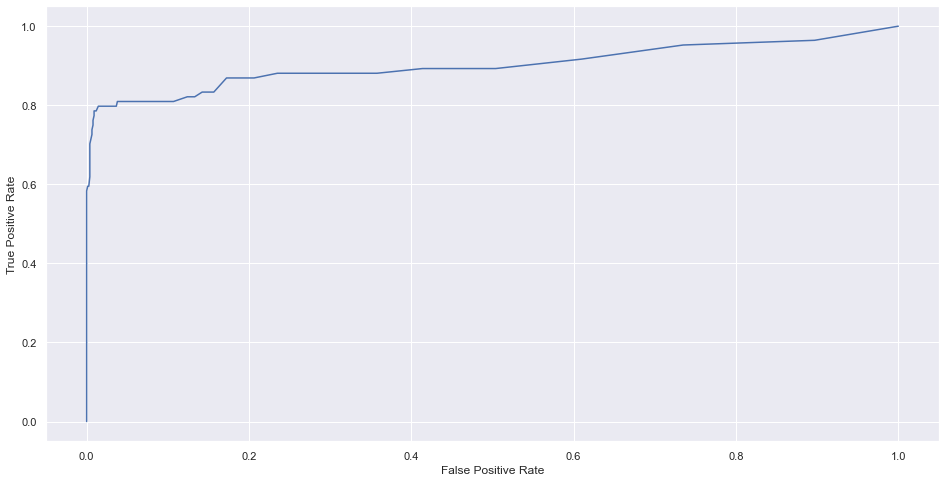

In [71]:
#define metrics
rf_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr,threshold = metrics.roc_curve(y_test,  rf_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [73]:
y_predict_smote = rf_smote.predict(X_test)

In [74]:

accuracy_score(y_test, y_predict_smote)

0.9505882352941176

In [75]:
pd.crosstab(y_test,y_predict_smote )

col_0,0,1
churn,,
0,744,22
1,20,64


In [76]:
print(classification_report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       766
           1       0.74      0.76      0.75        84

    accuracy                           0.95       850
   macro avg       0.86      0.87      0.86       850
weighted avg       0.95      0.95      0.95       850



In [77]:
# checking on smote data
ypred = y_predict_smote
model = rf_smote
print ('Confusion Matrix:')
print(confusion_matrix(y_test, ypred))
print('\nAccuracy:', accuracy_score(y_test, ypred))
print("Overall Precision:",precision_score(y_test, ypred))
print("Overall Recall:",recall_score(y_test, ypred))
print("Overall f1-score:", f1_score(y_test, ypred))
auc = roc_auc_score(y_test,ypred)
plt.show()

Confusion Matrix:
[[744  22]
 [ 20  64]]

Accuracy: 0.9505882352941176
Overall Precision: 0.7441860465116279
Overall Recall: 0.7619047619047619
Overall f1-score: 0.7529411764705882


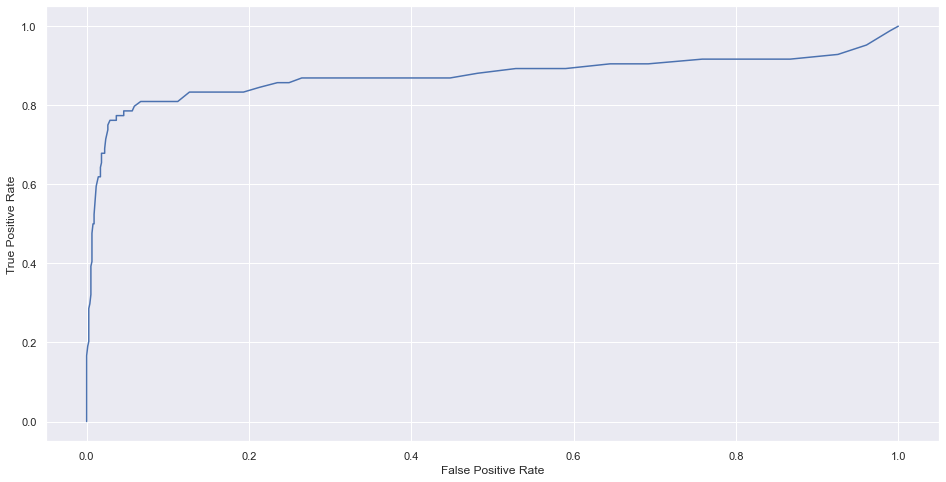

In [78]:
rf_smote_proba = rf_smote.predict_proba(X_test)[:,1]
fpr, tpr,threshold= metrics.roc_curve(y_test,  rf_smote_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [79]:
roc_auc_score(y_test,rf_smote_proba)*100

87.34303120726096

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [81]:
y_predict = lr.predict(X_test)

In [82]:
accuracy_score(y_test, y_predict)

0.9129411764705883

In [83]:
pd.crosstab(y_test,y_predict)

col_0,0,1
churn,,
0,751,15
1,59,25


In [84]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       766
           1       0.62      0.30      0.40        84

    accuracy                           0.91       850
   macro avg       0.78      0.64      0.68       850
weighted avg       0.90      0.91      0.90       850



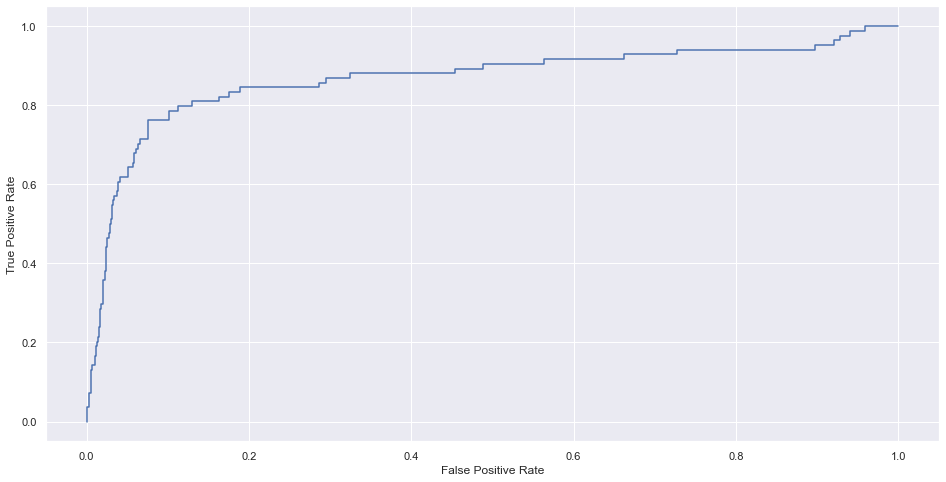

In [85]:
#define metrics
lr_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr,threshold = metrics.roc_curve(y_test,  lr_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
roc_auc_score(y_test,lr_proba )*100

86.71515603630486

In [87]:
lr_smote = LogisticRegression()
lr_smote.fit(X_train_smote,y_train_smote)

E:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
y_predict_smote = lr_smote.predict(X_test)

In [89]:
pd.crosstab(y_test,y_predict_smote )

col_0,0,1
churn,,
0,527,239
1,19,65


In [90]:
print(classification_report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       0.97      0.69      0.80       766
           1       0.21      0.77      0.34        84

    accuracy                           0.70       850
   macro avg       0.59      0.73      0.57       850
weighted avg       0.89      0.70      0.76       850



In [91]:
# checking on smote data
ypred = y_predict_smote
model = lr_smote
print ('Confusion Matrix:')
print(confusion_matrix(y_test, ypred))
print('\nAccuracy:', accuracy_score(y_test, ypred))
print("Overall Precision:",precision_score(y_test, ypred))
print("Overall Recall:",recall_score(y_test, ypred))
print("Overall f1-score:", f1_score(y_test, ypred))
auc = roc_auc_score(y_test,ypred)
plt.show()

Confusion Matrix:
[[527 239]
 [ 19  65]]

Accuracy: 0.6964705882352941
Overall Precision: 0.2138157894736842
Overall Recall: 0.7738095238095238
Overall f1-score: 0.3350515463917526


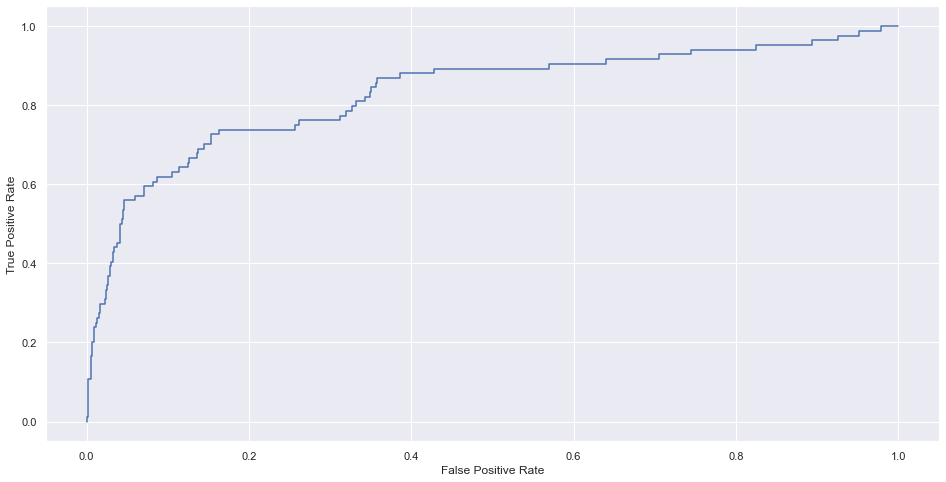

In [92]:
lr_smote_proba = lr_smote.predict_proba(X_test)[:,1]
fpr, tpr,threshold= metrics.roc_curve(y_test,  lr_smote_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
roc_auc_score(y_test,lr_smote_proba )*100

83.03182891955737

### Decision Tree

In [94]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
y_predict = dt.predict(X_test)

In [96]:
accuracy_score(y_test, y_predict)

0.9247058823529412

In [97]:
pd.crosstab(y_test,y_predict)

col_0,0,1
churn,,
0,728,38
1,26,58


In [98]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       766
           1       0.60      0.69      0.64        84

    accuracy                           0.92       850
   macro avg       0.78      0.82      0.80       850
weighted avg       0.93      0.92      0.93       850



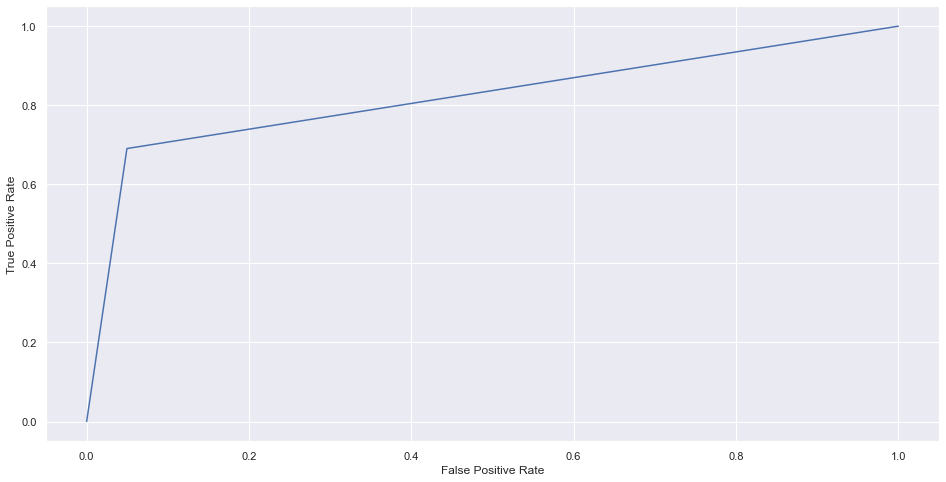

In [99]:
#define metrics
dt_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr,threshold = metrics.roc_curve(y_test,  dt_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
roc_auc_score(y_test,dt_proba )*100

82.04339176924033

In [101]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [102]:
y_predict_smote = dt_smote.predict(X_test)

In [103]:
pd.crosstab(y_test,y_predict_smote )

col_0,0,1
churn,,
0,675,91
1,25,59


In [104]:
print(classification_report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       766
           1       0.39      0.70      0.50        84

    accuracy                           0.86       850
   macro avg       0.68      0.79      0.71       850
weighted avg       0.91      0.86      0.88       850



In [105]:
# checking on smote data
ypred = y_predict_smote
model = dt_smote
print ('Confusion Matrix:')
print(confusion_matrix(y_test, ypred))
print('\nAccuracy:', accuracy_score(y_test, ypred))
print("Overall Precision:",precision_score(y_test, ypred))
print("Overall Recall:",recall_score(y_test, ypred))
print("Overall f1-score:", f1_score(y_test, ypred))
auc = roc_auc_score(y_test,ypred)
plt.show()

Confusion Matrix:
[[675  91]
 [ 25  59]]

Accuracy: 0.8635294117647059
Overall Precision: 0.3933333333333333
Overall Recall: 0.7023809523809523
Overall f1-score: 0.5042735042735043


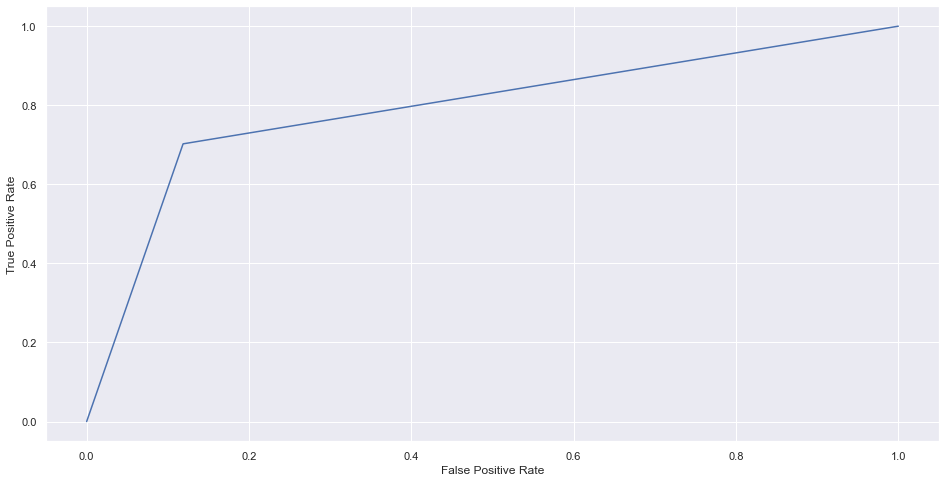

In [106]:
dt_smote_proba = dt_smote.predict_proba(X_test)[:,1]
fpr, tpr,threshold= metrics.roc_curve(y_test,  dt_smote_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost

In [107]:
xg = XGBClassifier()
xg.fit(X_train, y_train)

E:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:27:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_predict = xg.predict(X_test)

In [109]:
ypred = y_predict
model = xg
print ('Confusion Matrix:')
print(confusion_matrix(y_test, ypred))
print('\nAccuracy:', accuracy_score(y_test, ypred))
print("Overall Precision:",precision_score(y_test, ypred))
print("Overall Recall:",recall_score(y_test, ypred))
print("Overall f1-score:", f1_score(y_test, ypred))
auc = roc_auc_score(y_test,ypred)
plt.show()

Confusion Matrix:
[[755  11]
 [ 27  57]]

Accuracy: 0.9552941176470588
Overall Precision: 0.8382352941176471
Overall Recall: 0.6785714285714286
Overall f1-score: 0.7500000000000001


In [110]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       766
           1       0.84      0.68      0.75        84

    accuracy                           0.96       850
   macro avg       0.90      0.83      0.86       850
weighted avg       0.95      0.96      0.95       850



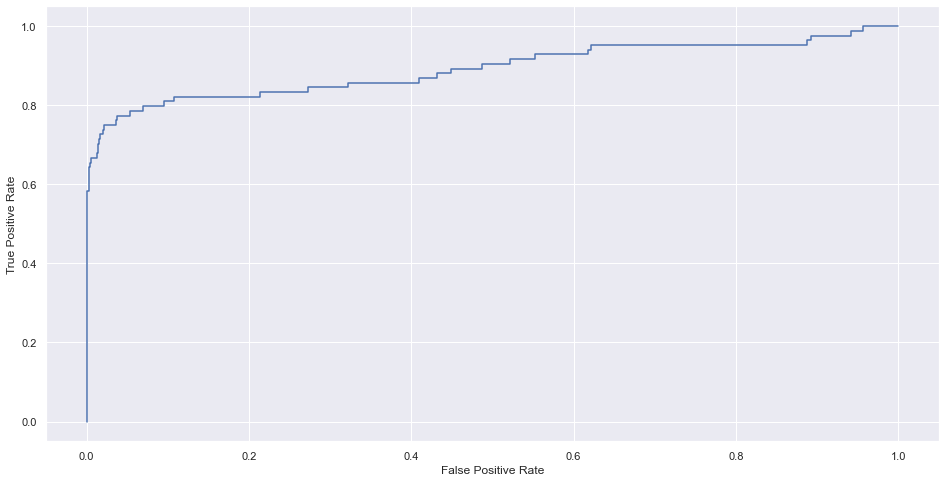

In [111]:
#define metrics
xg_proba = xg.predict_proba(X_test)[:,1]
fpr, tpr,threshold = metrics.roc_curve(y_test,  xg_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [112]:
xg_smote = XGBClassifier()
xg_smote.fit(X_train_smote,y_train_smote)

E:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_predict_smote = xg_smote.predict(X_test)

In [114]:
ypred = y_predict_smote
model = xg_smote
print ('Confusion Matrix:')
print(confusion_matrix(y_test, ypred))
print('\nAccuracy:', accuracy_score(y_test, ypred))
print("Overall Precision:",precision_score(y_test, ypred))
print("Overall Recall:",recall_score(y_test, ypred))
print("Overall f1-score:", f1_score(y_test, ypred))
auc = roc_auc_score(y_test,ypred)
plt.show()

Confusion Matrix:
[[750  16]
 [ 20  64]]

Accuracy: 0.9576470588235294
Overall Precision: 0.8
Overall Recall: 0.7619047619047619
Overall f1-score: 0.7804878048780488


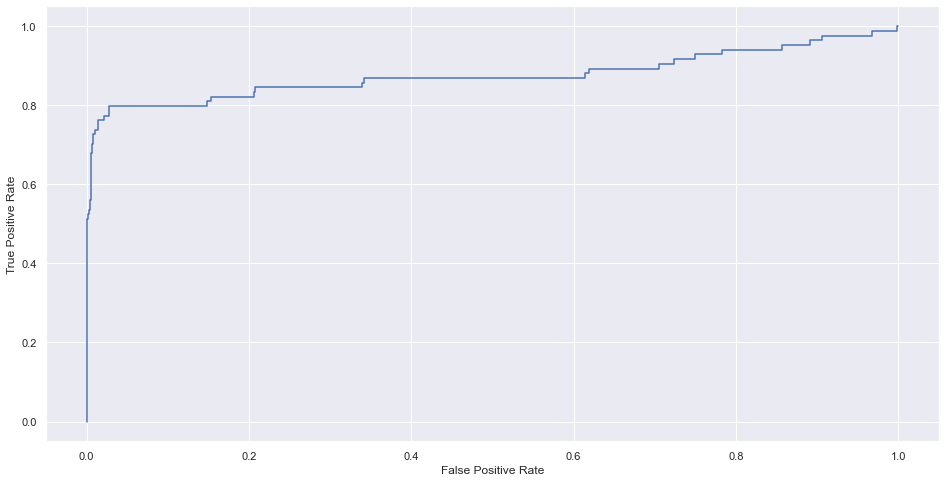

In [115]:
xg_smote_proba = xg_smote.predict_proba(X_test)[:,1]
fpr, tpr,threshold= metrics.roc_curve(y_test,  xg_smote_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
joblib.dump( rf, 'deployment13.pkl')

['deployment13.pkl']